# Aim:

> To clean raw data and store the data in database

> import data from database and analyze all relevant data and to get insights



# steps steps involved:

>step 1 : importing all libraries and data


> step 2 : data observations:

             > data and data types read correctly or not

             > find  duplicates and handling

             > find  missing values and handling

> step 3: Database :
    
            > create database


            > Store the clean data in data base 


            > read data from database
    
> step 4 : Exploratory data analysis

# Step - 1

In [64]:
# importing all libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure




import plotly.io as pio
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import LabelEncoder
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
pio.templates.default = "none"
init_notebook_mode(connected=True)
import plotly.io as pio

pio.renderers

import missingno as msg

In [2]:
import warnings
warnings.filterwarnings("ignore") # ignoring wranings

In [3]:
# import raw data 
data = pd.read_excel('Dataset - Data Analysis.xlsx', sheet_name="Data")

In [4]:
data.shape # exploring number of observations and variables

(134, 13)

### observations :
> total 134 observations and 13 features.

# Step-2

### Examining observations and features

In [5]:
data.head() 
# it is not about first 5 or 10 rows
# Aim is to check if data looks fine

,Customer_ID,Weeks,Contract_Renewal,Data_Plan,Data_Usage,Calls_To_Customer_Care,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins,Customer_Attrition,Inserted_Date
0,1001,47,1,Yes,2.3,1,128.2,97,34.2,10.00,9.1,No,2022-05-16
1,1002,30,1,No,0.0,2,210.5,105,55.3,15.50,0.0,Yes,2022-05-16
2,1003,52,0,Yes,4.1,0,221.7,120,70.5,9.75,0.0,No,2022-05-16
3,1004,25,1,No,0.0,4,183.6,97,52.7,17.00,10.0,Yes,2022-05-16
4,1005,38,1,Yes,2.6,1,110.7,112,32.2,10.50,3.3,No,2022-05-16


> have both catgorical features and numerical features and date feature

In [6]:
data.dtypes # Checking if datatypes are read correctly. 
# We have to be sure about data types first and then match it with dtypes result. 
# If it is correct we are good otherewise we have to change the data type.

Customer_ID                        int64
Weeks                              int64
Contract_Renewal                   int64
Data_Plan                         object
Data_Usage                       float64
Calls_To_Customer_Care             int64
DayMins                          float64
DayCalls                           int64
MonthlyCharge                    float64
OverageFee                       float64
RoamMins                         float64
Customer_Attrition                object
Inserted_Date             datetime64[ns]
dtype: object

In [7]:
# to check data type  read correctly or not
for i in data.columns:
    print(i,'  --',data[i].dtype,'--    ',data[i].unique()[:5])

Customer_ID   -- int64 --     [1001 1002 1003 1004 1005]
Weeks   -- int64 --     [47 30 52 25 38]
Contract_Renewal   -- int64 --     [1 0]
Data_Plan   -- object --     ['Yes' 'No']
Data_Usage   -- float64 --     [2.3 0.  4.1 2.6 3.8]
Calls_To_Customer_Care   -- int64 --     [1 2 0 4 3]
DayMins   -- float64 --     [128.2 210.5 221.7 183.6 110.7]
DayCalls   -- int64 --     [ 97 105 120 112  95]
MonthlyCharge   -- float64 --     [34.2 55.3 70.5 52.7 32.2]
OverageFee   -- float64 --     [10.   15.5   9.75 17.   10.5 ]
RoamMins   -- float64 --     [ 9.1  0.  10.   3.3  8.8]
Customer_Attrition   -- object --     ['No' 'Yes']
Inserted_Date   -- datetime64[ns] --     ['2022-05-16T00:00:00.000000000' '2022-05-17T00:00:00.000000000']


## observation:
> data and data types  match correctly 

In [8]:
# to check how many catgories have each feature 
for i in data.columns:
    print('number of cat  {0} : {1} '.format( i ,data[i].value_counts().count()))

number of cat  Customer_ID : 130 
number of cat  Weeks : 36 
number of cat  Contract_Renewal : 2 
number of cat  Data_Plan : 2 
number of cat  Data_Usage : 28 
number of cat  Calls_To_Customer_Care : 5 
number of cat  DayMins : 124 
number of cat  DayCalls : 44 
number of cat  MonthlyCharge : 115 
number of cat  OverageFee : 28 
number of cat  RoamMins : 61 
number of cat  Customer_Attrition : 2 
number of cat  Inserted_Date : 2 


In [9]:
# data summary
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Customer_ID             134 non-null    int64         
 1   Weeks                   134 non-null    int64         
 2   Contract_Renewal        134 non-null    int64         
 3   Data_Plan               134 non-null    object        
 4   Data_Usage              134 non-null    float64       
 5   Calls_To_Customer_Care  134 non-null    int64         
 6   DayMins                 134 non-null    float64       
 7   DayCalls                134 non-null    int64         
 8   MonthlyCharge           133 non-null    float64       
 9   OverageFee              133 non-null    float64       
 10  RoamMins                134 non-null    float64       
 11  Customer_Attrition      134 non-null    object        
 12  Inserted_Date           134 non-null    datetime64

### observation :

> total float_datatypes 5 

> int_datatypes 5 

> object_datatypes=2 and one datetime_object 

> There are missing values in columns

## Check duplicates 

In [10]:
# check duplicates
duplicates=data.duplicated().sum()
print(f'total duplicates : {duplicates}')


total duplicates : 3


In [11]:
# find duplicates
data[data.duplicated()]

,Customer_ID,Weeks,Contract_Renewal,Data_Plan,Data_Usage,Calls_To_Customer_Care,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins,Customer_Attrition,Inserted_Date
114,1111,53,1,Yes,2.4,1,179.7,107,58.40,9.75,10.9,No,2022-05-17
115,1112,53,1,Yes,3.2,3,199.6,110,64.15,10.25,9.9,Yes,2022-05-17
116,1113,53,1,Yes,3.5,0,192.3,98,61.50,9.75,9.2,No,2022-05-17


In [12]:
# manually check duplicates 
data[data['Customer_ID']==1111]

,Customer_ID,Weeks,Contract_Renewal,Data_Plan,Data_Usage,Calls_To_Customer_Care,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins,Customer_Attrition,Inserted_Date
110,1111,53,1,Yes,2.4,1,179.7,107,58.4,9.75,10.9,No,2022-05-17
114,1111,53,1,Yes,2.4,1,179.7,107,58.4,9.75,10.9,No,2022-05-17


In [13]:
# remove duplicates
data.drop_duplicates(inplace=True)

In [14]:
# check duplicates
duplicates=data.duplicated().sum()
print(f'total duplicates : {duplicates}')


total duplicates : 0


## Missing Values

In [15]:
# find missing values
data.isnull().sum()

Customer_ID               0
Weeks                     0
Contract_Renewal          0
Data_Plan                 0
Data_Usage                0
Calls_To_Customer_Care    0
DayMins                   0
DayCalls                  0
MonthlyCharge             1
OverageFee                1
RoamMins                  0
Customer_Attrition        0
Inserted_Date             0
dtype: int64

In [16]:
# percentage of null values

for i in data.columns:
    #print(i,np.round(data[i].isnull().mean()*100,3))
    print('number of null values in percentage%   {0} : {1} '.format( i ,round(data[i].isnull().mean()*100,3)))

number of null values in percentage%   Customer_ID : 0.0 
number of null values in percentage%   Weeks : 0.0 
number of null values in percentage%   Contract_Renewal : 0.0 
number of null values in percentage%   Data_Plan : 0.0 
number of null values in percentage%   Data_Usage : 0.0 
number of null values in percentage%   Calls_To_Customer_Care : 0.0 
number of null values in percentage%   DayMins : 0.0 
number of null values in percentage%   DayCalls : 0.0 
number of null values in percentage%   MonthlyCharge : 0.763 
number of null values in percentage%   OverageFee : 0.763 
number of null values in percentage%   RoamMins : 0.0 
number of null values in percentage%   Customer_Attrition : 0.0 
number of null values in percentage%   Inserted_Date : 0.0 


## observation :
> there are 2 missing values in two columns(MonthlyCharge,OverageFee )

>percentage of null values is less then 1%


### find relationship between missing values and other feartures

<AxesSubplot:>

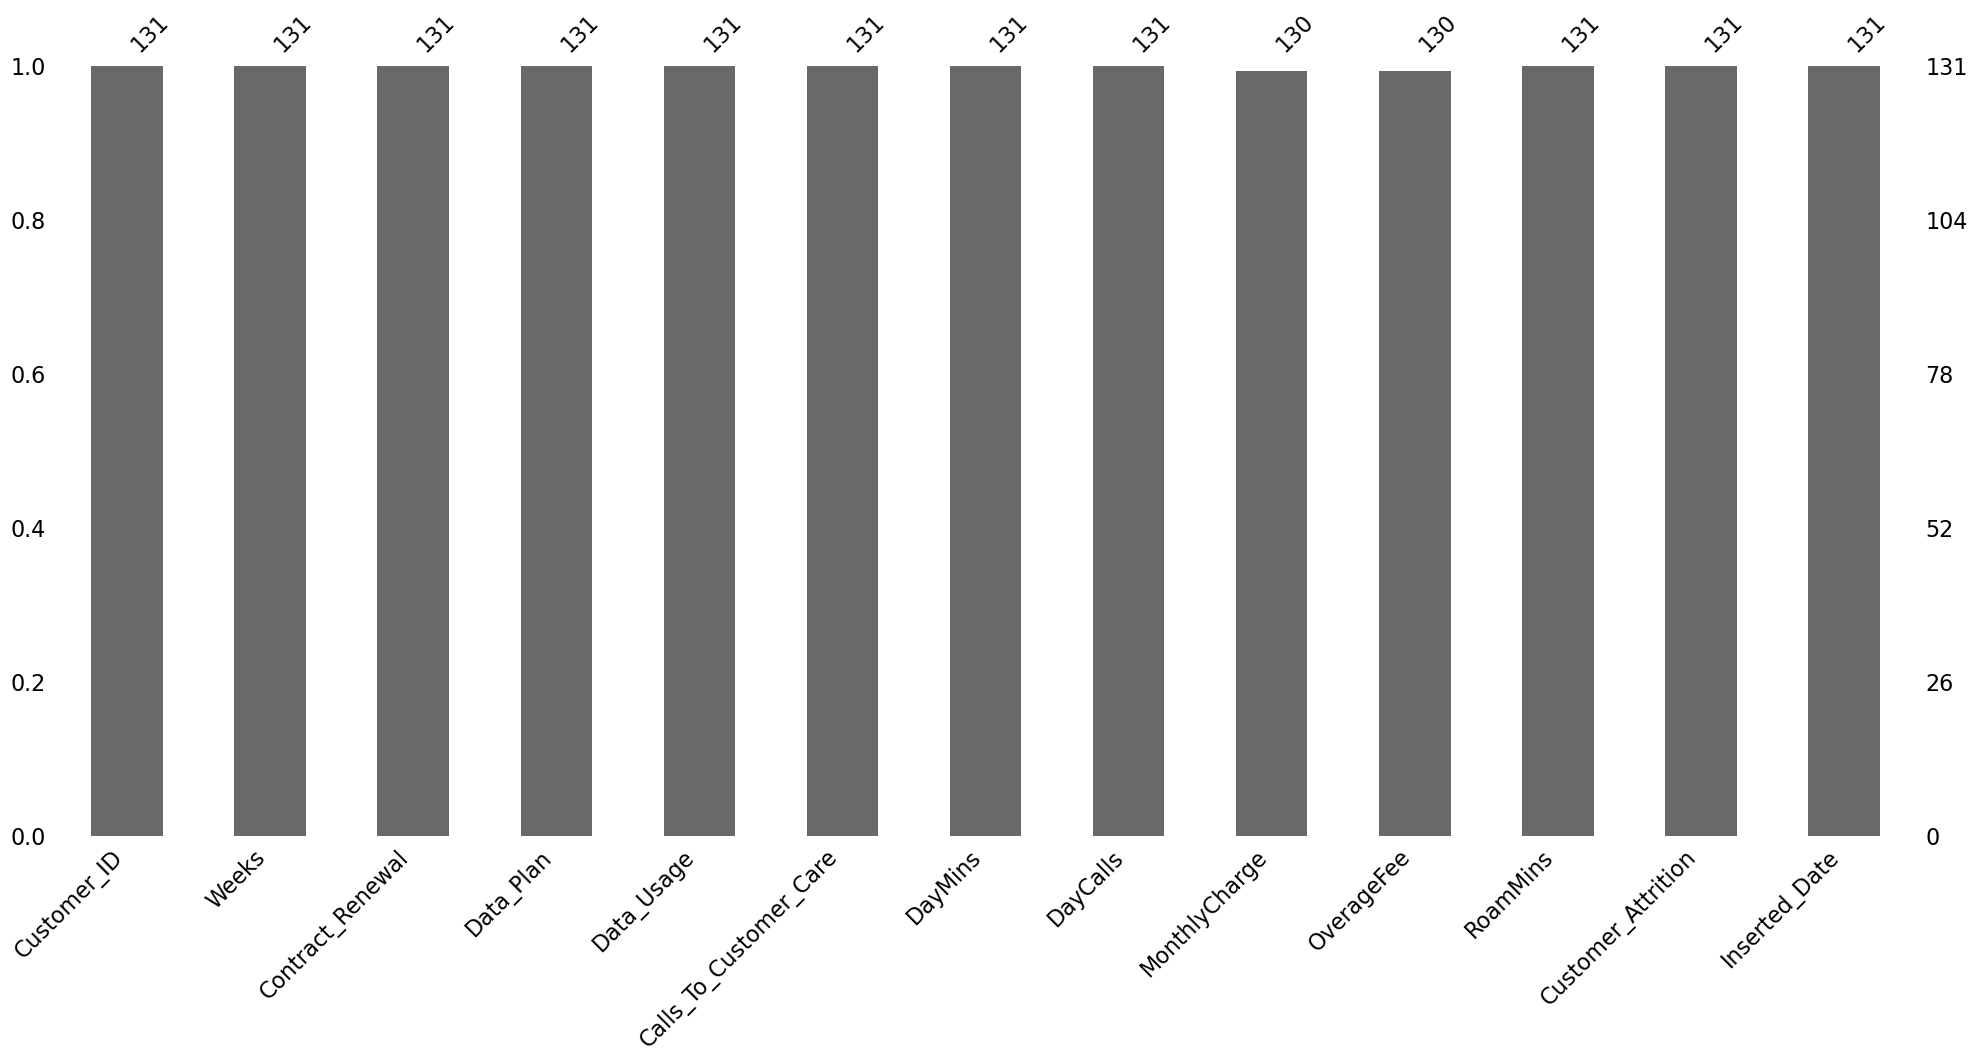

In [17]:
# to visualize null values with help of  missingno librarie
msg.bar(data)

### observation :
columns MonthlyCharge,OverageFee missing values their

<AxesSubplot:>

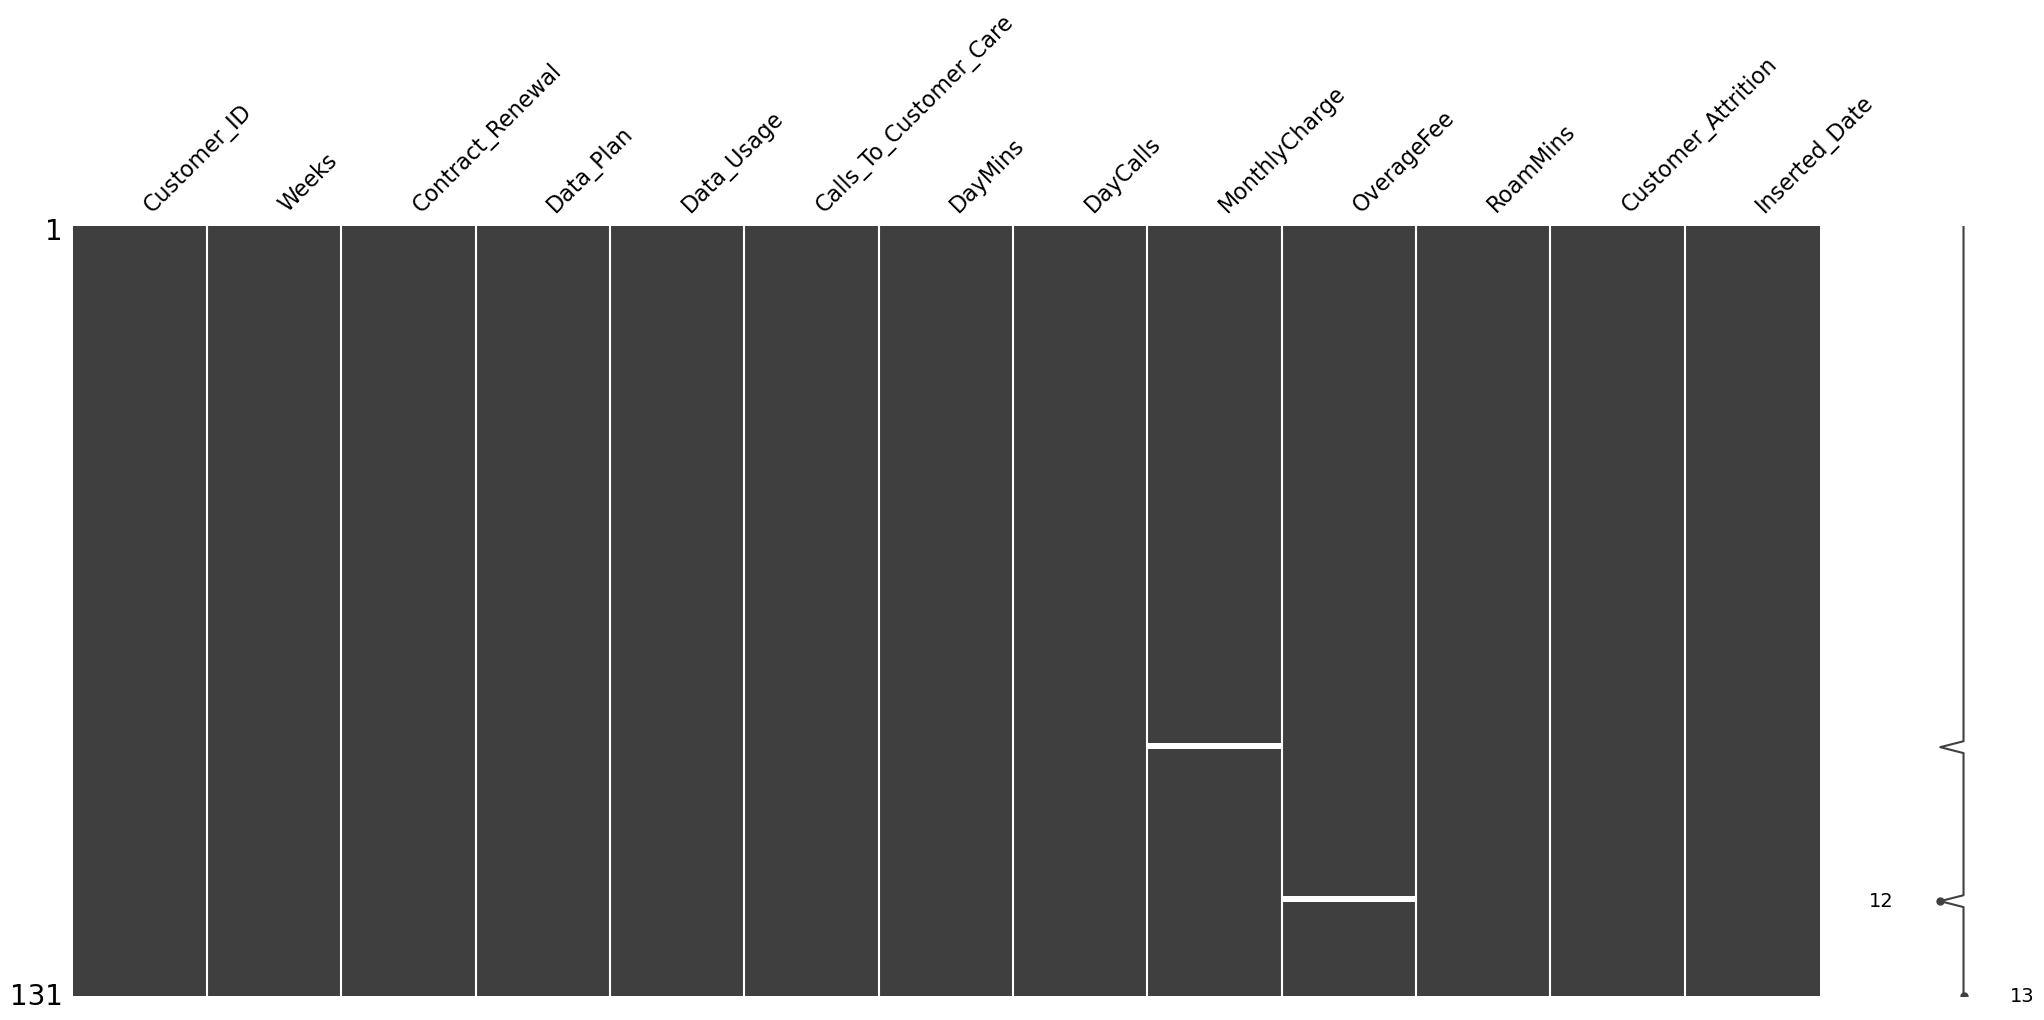

In [18]:
# check any relations between null values
msg.matrix(data)

<AxesSubplot:>

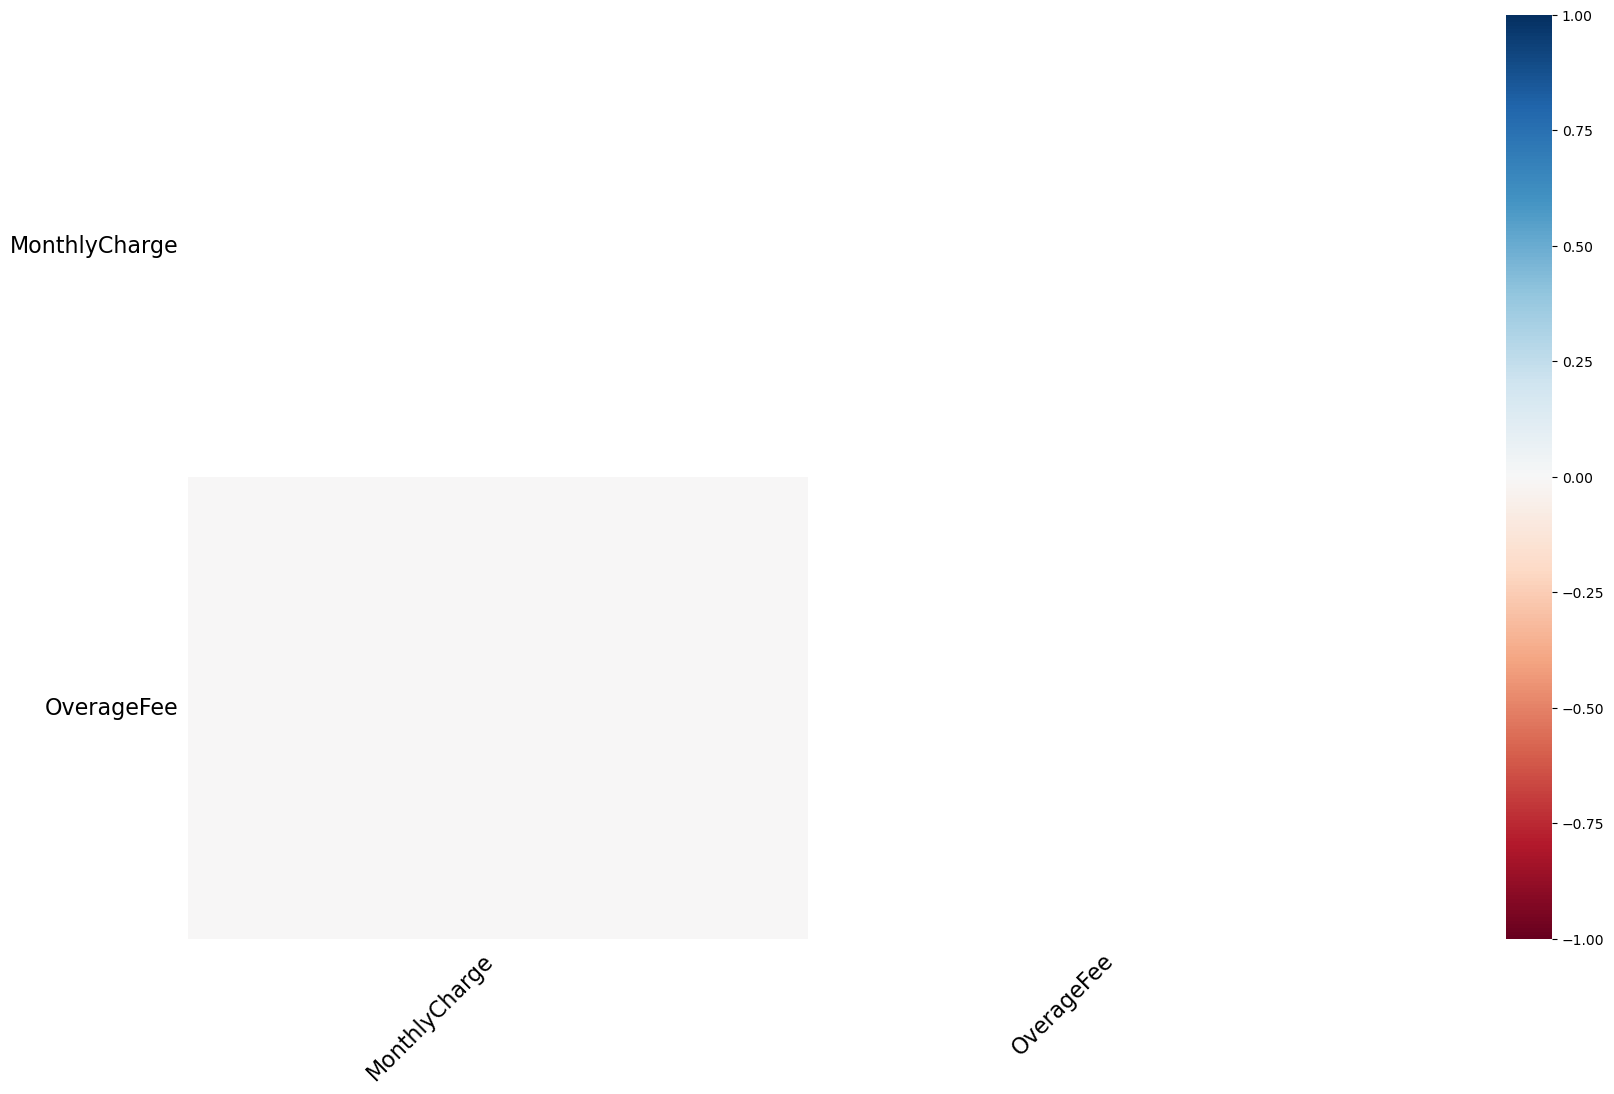

In [19]:
# check correation between null values
msg.heatmap(data)

### observation :
> there is no relations between null values

> there is no relations between any other features

In [20]:
# drop the missing values if there is no relation and percentage of missing values less then 1%
data.dropna(inplace=True)

In [21]:
# check any missing values there
# percentage of null values after drop
data.isnull().sum()

Customer_ID               0
Weeks                     0
Contract_Renewal          0
Data_Plan                 0
Data_Usage                0
Calls_To_Customer_Care    0
DayMins                   0
DayCalls                  0
MonthlyCharge             0
OverageFee                0
RoamMins                  0
Customer_Attrition        0
Inserted_Date             0
dtype: int64

# Step-3

## Store the clean data in mysql data base and read data from database

### create the database in mysql 

In [ ]:
# create the database in mysql 

from sqlalchemy import create_engine

username = 'root'
password = '****'
hostname = 'localhost'

new_database = 'database'

try:
    # Set up a connection to the MySQL server
    engine = create_engine(f'mysql+mysqlconnector://{username}:{password}@{hostname}')
    
    # Create the new database
    engine.execute(f"CREATE DATABASE {new_database}")

except Exception as e:
    print(f'Error: {e}')

finally:
    # Close the engine
    engine.dispose()

### Export Data to Database

In [ ]:
# Uplode Data to Database
username = 'root'
password = 'mani'
hostname = 'localhost'
database = 'Vivifi'

try:
    # Set up a connection to the MySQL server
    engine = create_engine(f'mysql+mysqlconnector://{username}:{password}@{hostname}/{database}')
    
    # Uplode Data to Database
    data.to_sql('data', engine)

except Exception as e:
    print(f'Error: {e}')

finally:
    # Close the engine
    engine.dispose()

### Import data from database

In [24]:
try:
    # Set up a connection to the MySQL server
    engine = create_engine(f'mysql+mysqlconnector://{username}:{password}@{hostname}/{database}')
    
    # Create the new database
       
    sql = "select * from data"
    
    data= pd.read_sql(sql,con=engine)
    
except Exception as e:
    print(f'Error: {e}')

finally:
    # Close the engine
    engine.dispose()


In [25]:
# from data base
data.head()

,index,Customer_ID,Weeks,Contract_Renewal,Data_Plan,Data_Usage,Calls_To_Customer_Care,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins,Customer_Attrition,Inserted_Date
0,0,1001,47,1,Yes,2.3,1,128.2,97,34.2,10.00,9.1,No,2022-05-16
1,1,1002,30,1,No,0.0,2,210.5,105,55.3,15.50,0.0,Yes,2022-05-16
2,2,1003,52,0,Yes,4.1,0,221.7,120,70.5,9.75,0.0,No,2022-05-16
3,3,1004,25,1,No,0.0,4,183.6,97,52.7,17.00,10.0,Yes,2022-05-16
4,4,1005,38,1,Yes,2.6,1,110.7,112,32.2,10.50,3.3,No,2022-05-16


# Step-4

# # Exploratory data analysis

## 1.What is the correlation between the number of calls to customer care and customer attrition?


In [26]:
# The crosstab() function is used to compute a simple cross tabulation of two (or more) factors.

pd.crosstab(data['Customer_Attrition'], data['Calls_To_Customer_Care'])

Calls_To_Customer_Care,0,1,2,3,4
Customer_Attrition,,,,,
No,15,21,18,5,0
Yes,13,21,21,12,3


In [27]:
from scipy.stats import chi2_contingency
# Create a contingency table of the data
contingency_table = pd.crosstab(data['Customer_Attrition'], data['Calls_To_Customer_Care'])

# Perform the chi-squared test
_, p_value, _,_ = chi2_contingency(contingency_table)

# Print the results
print('Chi-Squared Test:')
print(f'the p-value of the chisq test is :{p_value:.4f}')

Chi-Squared Test:
the p-value of the chisq test is :0.2526


the P-value came higher than 0.05. Hence H0(null hypothesis) will be accepted. Which means the variables are not correlated with each other.

This means, there is no correlation between the number of calls to customer care and customer attrition



### visualization of the number of calls to customer care and customer attrition

In [28]:
# create histogram plot
fig = px.histogram(data, x="Calls_To_Customer_Care", y=None, color="Customer_Attrition")
# custom layout
fig.update_layout(title=" customer attrition and contract renewal", 
                  font_family="San Serif",titlefont={'size': 34},
                  barmode='group',
                  xaxis=dict(title='Contract_Renewal',tickmode='array'),
                  yaxis=dict(title='Count'))



# remove grids on plot
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

## observation

> contract_renewal(4) has zero customer_Attrition

> contract_renewal(1) has highest NO customer_Attrition

> contract_renewal(1 and 2) has highest Yes customer_Attrition

> there is no correlation between the number of calls to customer care and customer attrition

### 2.Which data plan (Yes or No) has a higher average monthly charge?

In [29]:
# create dataframe  for average monthly charge
monthly_charge_avg=pd.DataFrame(data.groupby('Data_Plan')['MonthlyCharge'].mean()) 
monthly_charge_avg

,MonthlyCharge
Data_Plan,
No,45.194444
Yes,61.890090


In [30]:
# create bar plot
fig=px.bar(data,x=monthly_charge_avg['MonthlyCharge'],y=monthly_charge_avg.index,color=monthly_charge_avg['MonthlyCharge'],orientation='h',template="ggplot2")



# custom color
colors = ['gray','#fe346e']

# custom layout
fig.update_layout(title=" Average Monthly Charge", 
                  font_family="San Serif",titlefont={'size': 34},
                  yaxis=dict(title='Data Plan',tickmode='array',ticktext=['Data_Plan_No', 'Data_Plan_Yes'],tickvals=[0, 1],color='#fe346e'),
                  xaxis=dict(title='Average'))

# custom traces
fig.update_traces(marker_color=colors, marker_line_color=None,
                  marker_line_width=2.5, opacity=None)

# remove grids on plot
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

## observation

> Customer who have  data plan (Yes ) has a higher average monthly charge 

> Average is '61.8'

### 3.Is there a relationship between customer attrition and contract renewal?

In [31]:
# The crosstab() function is used to compute a simple cross tabulation of two (or more) factors.
pd.crosstab(data['Customer_Attrition'], data['Contract_Renewal'])

Contract_Renewal,0,1
Customer_Attrition,,
No,2,57
Yes,8,62


In [32]:

# Create a contingency table of the data
contingency_table = pd.crosstab(data['Customer_Attrition'], data['Contract_Renewal'])

# Perform the chi-squared test
_, p_value, _, _ = chi2_contingency(contingency_table)

# Print the results
print('Chi-Squared Test:')

print(f'p-value = {p_value:.4f}')


Chi-Squared Test:
p-value = 0.1705


## Observation

the P-value came higher than 0.05. Hence H0(null hypothesis) will be accepted. Which means the variables are not correlated with each other.

This means, there is no relationship between customer attrition and contract renewal




##  visualization of customer attrition and contract renewal

In [33]:
# create histogram plot
fig = px.histogram(data, x="Contract_Renewal", y=None, color="Customer_Attrition")

fig.update_layout(title=" customer attrition and contract renewal", 
                  font_family="San Serif",titlefont={'size': 34},
                  barmode='group',
                  xaxis=dict(title='Contract_Renewal',tickmode='array',tickvals=[0, 1]),
                  yaxis=dict(title='Count'))




fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

## observation

> in both contract_renewal 0,1 has highest Customer_Attrition is "yes " 

>there is no relationship between customer attrition and contract renewal
 

### 4.Which feature(s) have the highest correlation with customer attrition?

In [34]:
# convert the  Customer_Attrition from catgorical to numerical to find out correlation 
# create new freature of Customer_Attrition in numerical form

data['Customer_Attrition_to_num']=data['Customer_Attrition'].map({'Yes':1,'No':0})# encoding

In [35]:
# Print correlation between all features and target variable with sorted
data.corr()['Customer_Attrition_to_num'].sort_values(ascending=False)

Customer_Attrition_to_num    1.000000
OverageFee                   0.318608
Calls_To_Customer_Care       0.175104
DayMins                      0.029902
MonthlyCharge               -0.040678
RoamMins                    -0.047010
Weeks                       -0.102481
Customer_ID                 -0.145306
Contract_Renewal            -0.149758
index                       -0.151607
Data_Usage                  -0.232417
DayCalls                    -0.250403
Name: Customer_Attrition_to_num, dtype: float64

## observation

> OverageFee feature have the highest correlation with customer attrition

## visualization 

<AxesSubplot:>

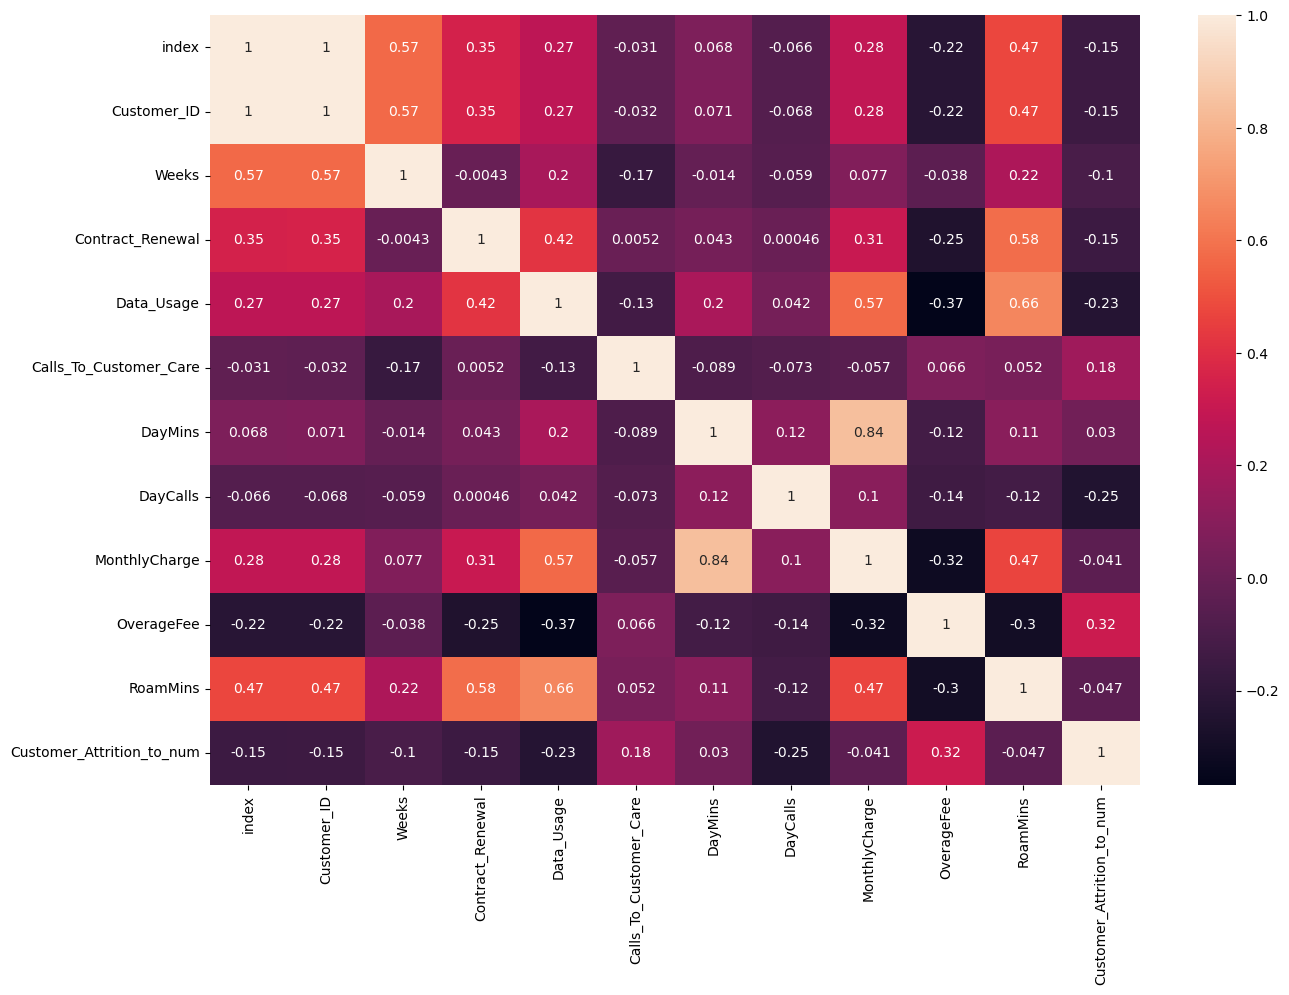

In [36]:
# Plot heatmap using Seaborn to visualize correlation.
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(), annot = True)

<AxesSubplot:>

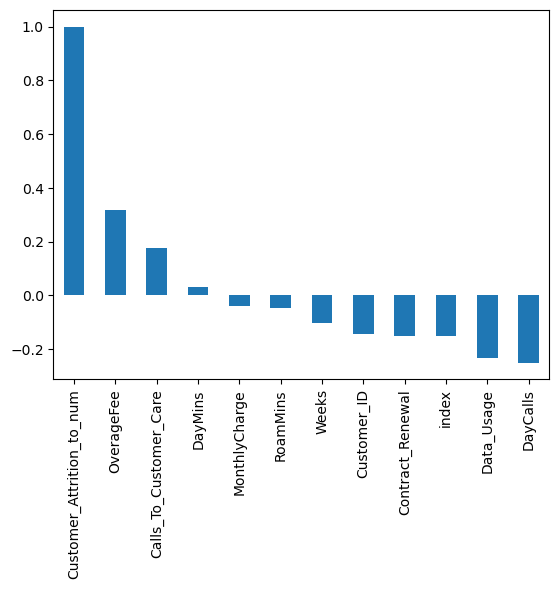

In [37]:
# Plot barplot using  to visualize  postive and negative correlation.
data.corr()['Customer_Attrition_to_num'].sort_values(ascending = False).plot(kind='bar')

## observation 
> some feature are postive correlated and some are negative correlated

> OverageFee feature have the highest correlation with customer attrition


###  5.Is there a difference in data usage between customers who have a data plan and those who do not?


In [38]:
data[data['Data_Plan']=='No']['Data_Usage'].value_counts()

0.0    18
Name: Data_Usage, dtype: int64

In [39]:
data[data['Data_Plan']=='Yes']['Data_Usage'].value_counts()

2.4    10
2.2    10
2.1    10
2.7     9
2.6     8
2.3     7
2.5     7
1.8     5
1.7     5
3.5     4
1.9     4
1.6     4
2.9     4
3.1     3
2.8     3
2.0     3
3.3     2
1.4     2
1.5     2
3.2     2
4.1     1
3.7     1
3.8     1
4.2     1
1.2     1
1.1     1
3.0     1
Name: Data_Usage, dtype: int64

## observation

> customers who do not  have  a data plan ,data_usage is zero(0.0) 

> customers who  have a data plan ,data_usage from 1 to 4.1

> yes ,there is a difference in data usage between customers who have a data plan and those who do not

## visualization

In [40]:
# create histogram plot
fig = px.histogram(data, x="Data_Plan", y='Data_Usage', color="Data_Plan")
#fig.update_coloraxes(showscale=False)
fig.update_layout(title=" customer attrition and contract renewal", 
                  font_family="San Serif",titlefont={'size': 34},
                  barmode='group',
                  xaxis=dict(title='Contract_Renewal',tickmode='array',tickvals=[0, 1]),
                  yaxis=dict(title='Count'))




fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

### observation:

yes ,there is a difference in data usage between customers who have a data plan and those who do not

### 6.What is the total revenue from customers who have a data plan and used greater than 3 GB of data

In [41]:
#MonthlyCharge and OverageFee are added to get total revenue and create new feature  revenue
data['revenue']=data['MonthlyCharge']+data['OverageFee']


In [42]:
revenue =data[(data['Data_Usage']>3) & (data['Data_Plan'] =='Yes') ].revenue.sum()

print(f'the total revenue from customers who have a data plan and used greater than 3 GB of data : {revenue}')

the total revenue from customers who have a data plan and used greater than 3 GB of data : 1131.8



### obsever that customers who do not  have a data plan  ,Data_Usage is zero ,so result is same  even not write condition of (data['Data_Plan'] =='Yes') 

### 7.What % of total revenue comes from customers who do not have a data plan?

In [43]:

total_revenue=round(data[data['Data_Plan']=='No'].revenue.sum()/data['revenue'].sum()*100,2)
print(f'% of total revenue comes from customers who do not have a data plan : {total_revenue}')

% of total revenue comes from customers who do not have a data plan : 11.47


### visualization

In [44]:
yes=data.loc[data['Data_Plan']=='Yes'].revenue.sum()
no=data.loc[data['Data_Plan']=='No'].revenue.sum()
combine=[yes,no]
names = ['Data_plan_Yes', 'Data_plan_No',]

fig = px.pie(values=combine, names=names,title="%  total revenue from customers")
fig.show()

# observation

> % of total revenue comes from customers who do not have a data plan : 11.2%

> % of total revenue comes from customers who  have a data plan : 88.8%

### 8.What is the ratio of average total revenue between customers who have a data plan and those who do not?


In [45]:
# import math librarie
import math 

#calculate average total revenue between customers who have a data plan and those who do not
with_data_plan = data.loc[data['Data_Plan']=='Yes'].revenue.mean()
without_data_plan = data.loc[data['Data_Plan']=='No'].revenue.mean()


# find out ration between them
a=round(with_data_plan)
b=round(without_data_plan)
h=math.gcd(a,b)

ratio = str(a/h) + ":" + str(b/h) 

print(f'the ratio of average total revenue between customers who have a data plan and those who do no : { ratio}')


the ratio of average total revenue between customers who have a data plan and those who do no : 36.0:29.0


### 9.Is there a difference in contract renewal rates between customers who have a data plan and those who do not?


In [46]:
# Create a contingency table of the data
contingency_table = pd.crosstab(data['Data_Plan'], data['Contract_Renewal'])

# Perform the chi-squared test
_, p_value, _, _ = chi2_contingency(contingency_table)

# Print the results
print('Chi-Squared Test:')

print(f'p-value = {p_value:.4f}')


Chi-Squared Test:
p-value = 0.0000


### observation :
> the p-value of the chisq test is :0.2526
  
> the P-value came less than 0.05. Hence H0(null hypothesis) will be rejected. Which means the variables are correlated with each other.

> yes,there a difference in contract renewal rates between customers who have a data plan and those who do not

In [47]:
# create histogram plot
fig = px.histogram(data, x="Contract_Renewal", y=None, color="Data_Plan")

fig.update_layout(title=" Contract_Renewal and Data_Plan", 
                  font_family="San Serif",titlefont={'size': 34},
                  barmode='group',
                  xaxis=dict(title='Contract_Renewal',tickmode='array'),
                  yaxis=dict(title='Count'))




fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

### observation:

> customers who have Contract_Renewal have more data_plane compare to  customers who do not  have Contract_Renewal 

>yes,there a difference in contract renewal rates between customers who have a data plan and those who do not

### 10.What % of revenue comes from overage fees for customers with no data plan, customers using 1-3 GB of data and customers using greater than 3 GB of data?


In [48]:
data[(data['Data_Plan']=='No')].OverageFee.sum()
# % of revenue comes from overage fees for customers with no data plan

witou_data_plane=round(data[data['Data_Plan']=='No'].OverageFee.sum()/data['OverageFee'].sum()*100,2)
print(f'% of revenue comes from overage fees for customers with no data plan : {witou_data_plane} %')

% of revenue comes from overage fees for customers with no data plan : 16.52 %


## visualization_1

In [49]:
d11=data.loc[data['Data_Plan']=='Yes'].OverageFee.sum()
d12=data.loc[data['Data_Plan']=='No'].OverageFee.sum()
values=[d11,d12]
labels = ['Data_plan_Yes', 'Data_plan_No',]

fig = px.pie(values=values, names=labels,title="% Revenue From Overage_Fees for Customers with no Data_Plan")

fig.show()

In [50]:
data[(data['Data_Usage']>=1) & (data['Data_Usage']<=3 )].OverageFee.sum()

 # % of revenue comes from overage fees for customers using 1-3 GB of data 
    
between_1_3=round(data[(data['Data_Usage']>=1) & (data['Data_Usage']<=3 )].OverageFee.sum()/data['OverageFee'].sum()*100,2)

print(f'% of revenue comes from overage fees for customers using 1-3 GB of data : {between_1_3} %')

% of revenue comes from overage fees for customers using 1-3 GB of data : 72.02 %


In [51]:
## visualization_2

In [52]:
d21=data[(data['Data_Usage']>=1) & (data['Data_Usage']<=3 )].OverageFee.sum()
d22=data['OverageFee'].sum()-data[(data['Data_Usage']>=1) & (data['Data_Usage']<=3 )].OverageFee.sum()
values2=[d21,d22]
labels2 = ['Data_Usage_Between_1-3GB', 'Remaing_Data_usage',]

fig = px.pie(values=values2, names=labels2,title="% revenue customers using 1-3 GB of data")

fig.show()

In [53]:
## visualization_3

In [54]:
data[(data['Data_Usage']>3 )].OverageFee.sum()

# % of revenue comes from overage fees for customers using greater than 3 GB of data

grater_3=round(data[(data['Data_Usage']>3 )].OverageFee.sum()/data['OverageFee'].sum()*100,2)

print(f'% of revenue comes from overage fees for customers using greater than 3 GB of data: {grater_3} %')

% of revenue comes from overage fees for customers using greater than 3 GB of data: 11.46 %


In [55]:
d31=data[(data['Data_Usage']>3 )].OverageFee.sum()
d32=data['OverageFee'].sum()-data[(data['Data_Usage']>3 )].OverageFee.sum()
values3=[d31,d32]
labels3 = ['Data_Usage_Greater_than_3GB', 'remaing_Data_Usage',]

fig = px.pie(values=values3, names=labels3,title="% revenue  customers using greater than 3 GB of data")

fig.show()


### 11.Do customers with weeks more than 50 have a lower minute per call ratio or customers with weeks between 31 and 50 ?


In [56]:
# create new feature from MinPerCall and DayMins to get minute per call ratio
#new feature is total_minPerCall

total_minPerCall=data['MinPerCall']=data['DayMins']/data['DayCalls']

In [57]:
# to get lower_minPerCall from total_minPerCall and customers with weeks between 31 and 50
lower_minPerCall=data[((data['Weeks'] > 50) & (data['MinPerCall'] <1)) | ((data['Weeks'] >=31) & (data['Weeks'] <=50))]
print('total customers : ',lower_minPerCall['Customer_ID'].count())

total customers :  60


### observation :
yes,the total 60 customers who have weeks more than 50 have a lower minute per call ratio or customers with weeks between 31 and 50

### 12.What is the average overage fee for customers whose contracts are more than 30 weeks old and have a data plan and have used less than 1GB of data?


In [58]:
result=data[(data['Weeks'] > 30) & (data['Data_Usage'] <1) & (data['Data_Plan']=='Yes') ].OverageFee.mean()

print(f'avg fee customers whoes more than 30 weeks old and data plan and have used less than 1GB of data : {result }')

avg fee customers whoes more than 30 weeks old and data plan and have used less than 1GB of data : nan


### observation:
> zero customers who have a data plan and have used less than 1GB of data 

> the average overage fee for customers whose contracts are more than 30 weeks old and have a data plan and have used less than 1GB of data is null



### 13.What is the average monthly charge for customers whose contracts are more than 50 weeks old and have a data plan and have renewed their contract?


In [59]:
result=round(data[(data['Weeks'] > 50)  & (data['Data_Plan']=='Yes') & (data['Contract_Renewal'] == 1)].MonthlyCharge.mean(),2)
print(f'avg monthly charge for customers whose contracts > 50 and data_plan and renewed_contract : {result}  ')

avg monthly charge for customers whose contracts > 50 and data_plan and renewed_contract : 62.05  


### 14.What is the average roam minutes for customers whose contracts are between 31-50 weeks and have a data plan and have used greater than 3GB of data?


In [60]:
result=round(data[(data['Weeks'] >= 31) &(data['Weeks'] <= 50) & (data['Data_Plan']=='Yes') & (data['Data_Usage'] >3)].RoamMins.mean(),2)

print(f'avg roam minutes for customers and contracts_between 31-50 weeks and data_plan and greater than 3GB  : {result}  ')

avg roam minutes for customers and contracts_between 31-50 weeks and data_plan and greater than 3GB  : 9.96  


### 15.What is the average data usage for customers whose contracts are more than 30 weeks old and have renewed their contract?


In [61]:
result=round(data[(data['Weeks'] > 30)  & (data['Contract_Renewal'] == 1)].Data_Usage.mean(),2)
print(f'avg data usage for customers whose contracts are more than 30 weeks and renewed_contract : {result}')

avg data usage for customers whose contracts are more than 30 weeks and renewed_contract : 2.26
